In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cluster_utils as cu
import os
import importlib

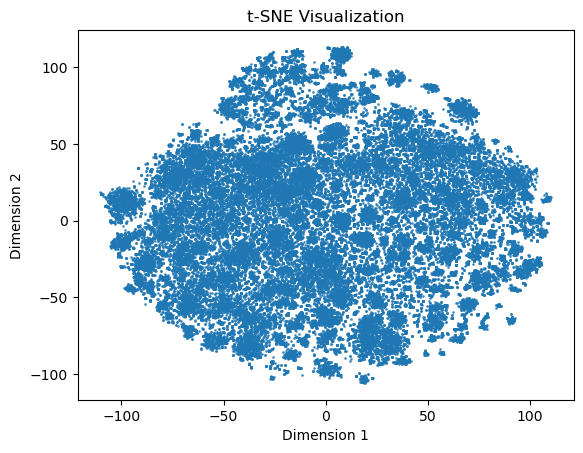

In [2]:
# get folder outside current directory (project folder)
current_dir = os.path.dirname(os.getcwd())
proj_dir = os.path.abspath(os.path.join(current_dir, '..'))

# Load the 2D coordinates
coordinates = np.load(proj_dir + "/dataset/pubmed_20241121_working_memory.embd.npy")

# Scatter plot
plt.scatter(coordinates[:, 0], coordinates[:, 1], s=1, alpha=0.7)
plt.title("t-SNE Visualization")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()


## Clustering

### hdbscan

In [3]:
%pip install hdbscan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 3.8 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [7]:
coordinates.shape

(73763, 2)

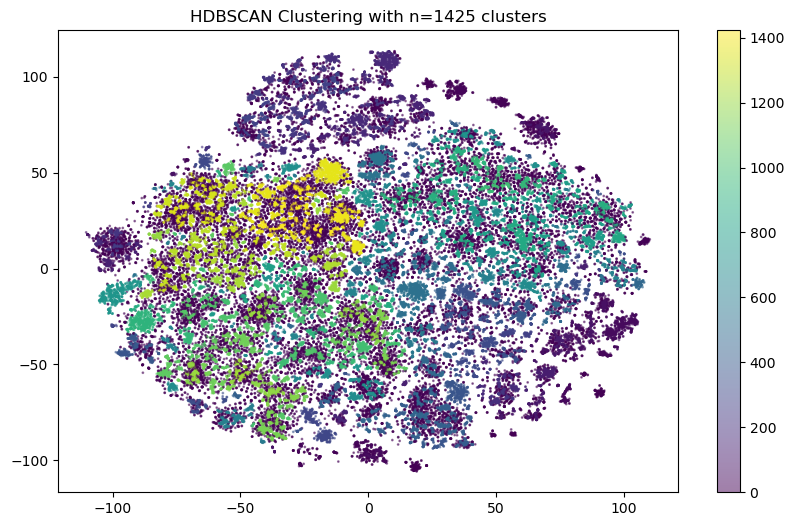

In [5]:
importlib.reload(cu)
hdbscan_labels = cu.hdbscan_cluster(coordinates, min_cluster_size=10, gen_min_span_tree=True, plot=1)

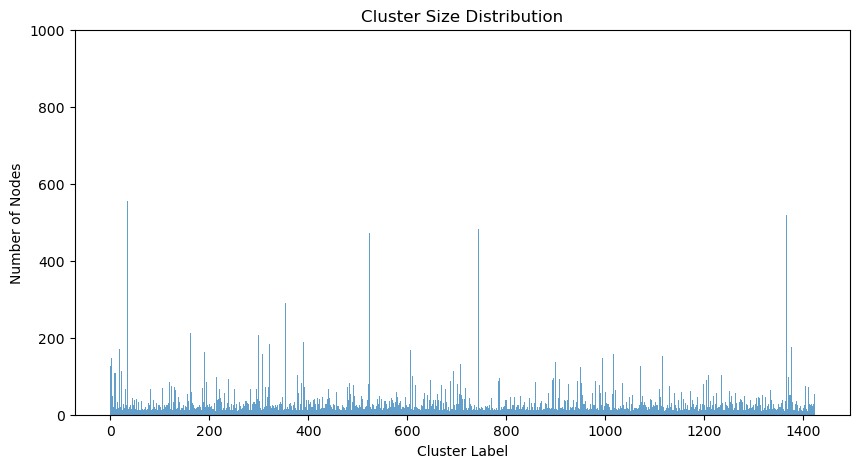

In [12]:
# plot cluster size distribution

plt.figure(figsize=(10, 5))
plt.hist(hdbscan_labels, bins=np.arange(-1, hdbscan_labels.max()+1, 1), alpha=0.7)
plt.title("Cluster Size Distribution")
plt.xlabel("Cluster Label")
plt.ylabel("Number of Nodes")
plt.ylim(0, 1000)
plt.show()

### K-means clustering

Let's start with a random number of clusters... (use same # found from hdbscan)

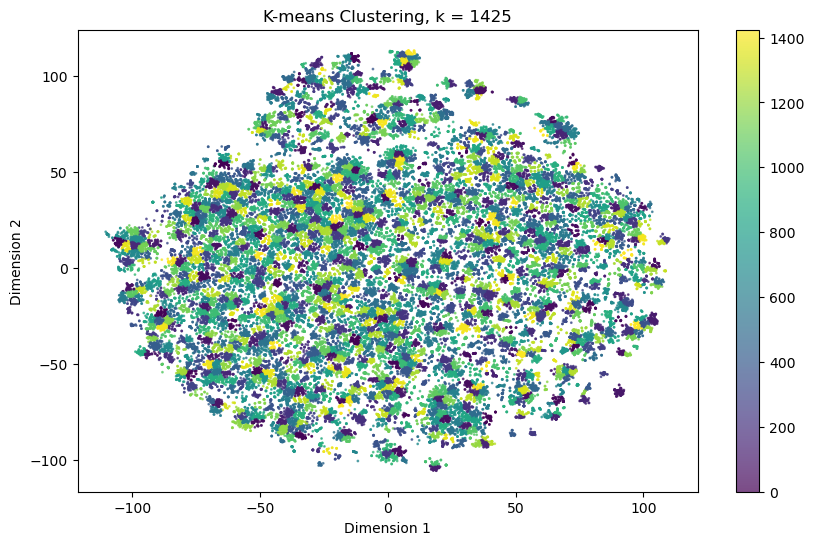

In [21]:
# Plot the clusters
importlib.reload(cu)
kmeans_labels = cu.kmeans_cluster(coordinates, n_clusters=1425, plot=1)

#### Optimal cluster number

Best number of clusters:  90
Best score:  4060665.25


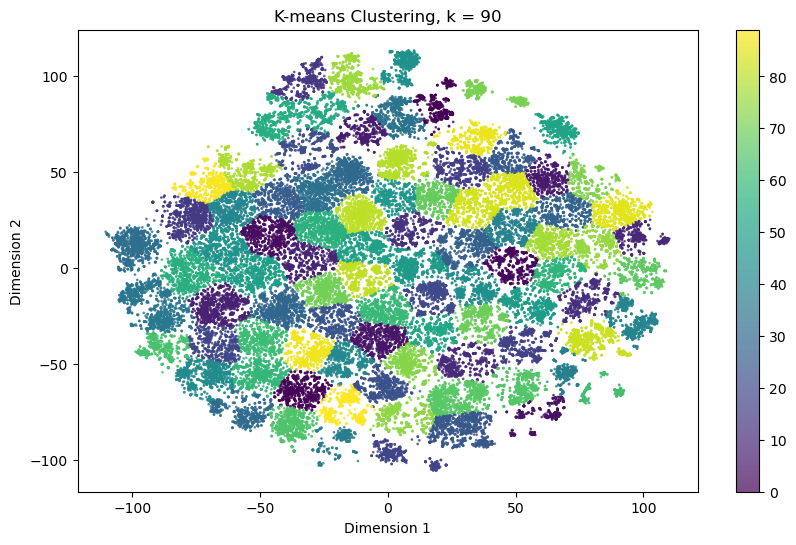

In [23]:
# test kmeans for optimal number of clusters (using inertia)
importlib.reload(cu)
cluster_range = np.arange(10, 100, 10)
best_k, best_score = cu.find_best_k(coordinates, method='inertia', range_k = cluster_range, plot=0)
print("Best number of clusters: ", best_k)
print("Best score: ", best_score)

# plot clusters with best k
kmeans_labels = cu.kmeans_cluster(coordinates, n_clusters=best_k, plot=1)

Best number of clusters:  900
Best score:  289852.8125


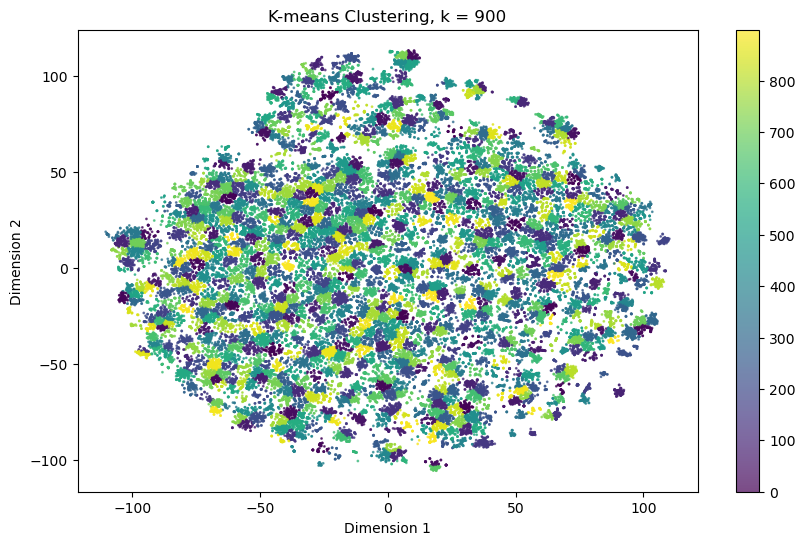

In [25]:
# test kmeans for optimal number of clusters (using inertia)
importlib.reload(cu)
cluster_range = np.arange(100, 1000, 100)
best_k, best_score = cu.find_best_k(coordinates, method='inertia', range_k = cluster_range, plot=0)
print("Best number of clusters: ", best_k)
print("Best score: ", best_score)

# plot clusters with best k
kmeans_labels = cu.kmeans_cluster(coordinates, n_clusters=best_k, plot=1)

Best number of clusters:  1425
Best score:  169278.15625


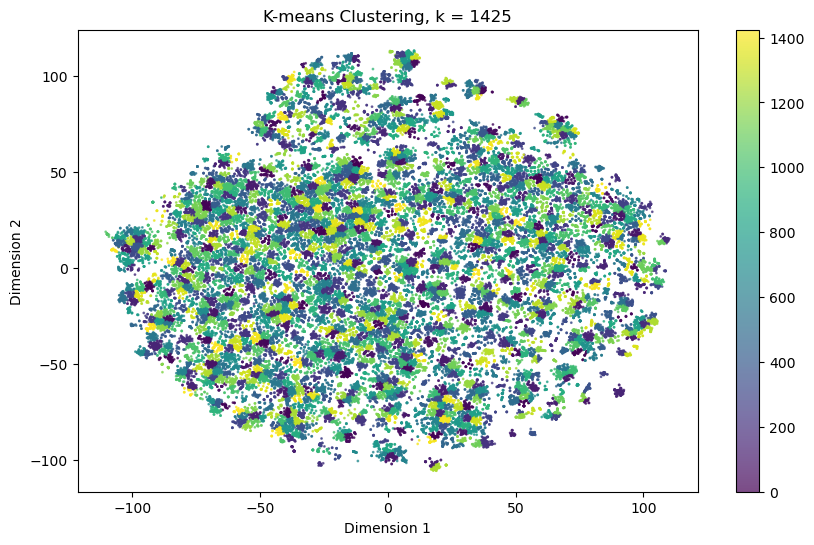

In [26]:
# test kmeans for optimal number of clusters (using inertia)
importlib.reload(cu)
cluster_range = [1425]
best_k, best_score = cu.find_best_k(coordinates, method='inertia', range_k = cluster_range, plot=0)
print("Best number of clusters: ", best_k)
print("Best score: ", best_score)

# plot clusters with best k
kmeans_labels = cu.kmeans_cluster(coordinates, n_clusters=best_k, plot=1)

### Louvain

## Stats

In [ ]:
# first load the embeddings